In [4]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [26]:
data = pd.read_csv(r'D:\Term 3\Banking analytics\Case Studies\Case_study_3\Profit_percentage_portfolio_cards.csv')
data.head()

,Year,Month,American Express Gold credit card,Indian Overseas Bank Visa International Credit card,Axis Platinum card,Bank of India's India Card,Gold International Card,Citibank Dinners Club International card,Union Bank of India Silver Card,Syndicate Global Classic Credit Card,...,Syndicate Global Gold Credit Card,CorpBank Gold card,Vijaya Bank Visa Gold Credit Card,HSBC Platinum card,Vijaya Bank MasterCard Global Card,CorpBank Classic card,Vijaya Bank VISA Classic International Card,HDFC Silver credit card,Vijaya Bank MasterCard Classic Credit Card,HDFC Cooperate credit card
0,2016,Nov,1.84,1.99,2.97,1.61,2.32,1.89,1.12,1.56,...,2.00,1.94,1.64,2.70,2.87,2.40,1.77,2.16,1.90,1.79
1,2016,Oct,1.84,2.00,2.97,1.62,2.35,1.93,1.12,1.60,...,1.99,2.01,1.64,2.72,2.80,2.40,1.81,2.16,1.95,1.81
2,2016,Sep,1.90,2.02,2.99,1.65,2.37,1.97,1.12,1.68,...,1.97,1.96,1.62,2.86,2.79,2.49,1.81,2.15,1.95,1.86
3,2016,Aug,1.87,2.01,3.05,1.69,2.49,1.97,1.14,1.72,...,2.12,1.99,1.64,2.81,2.71,2.56,1.86,2.15,2.00,1.90
4,2016,Jul,1.87,2.03,2.98,1.73,2.44,1.91,1.15,1.77,...,2.04,1.97,1.66,2.91,2.74,2.60,1.91,2.13,1.94,1.92


In [27]:
vijaya_bank = data[['Vijaya Bank Visa Gold Credit Card','Vijaya Bank MasterCard Global Card','Vijaya Bank VISA Classic International Card','Vijaya Bank MasterCard Classic Credit Card']]
vijaya_bank.head()

,Vijaya Bank Visa Gold Credit Card,Vijaya Bank MasterCard Global Card,Vijaya Bank VISA Classic International Card,Vijaya Bank MasterCard Classic Credit Card
0,1.64,2.87,1.77,1.90
1,1.64,2.80,1.81,1.95
2,1.62,2.79,1.81,1.95
3,1.64,2.71,1.86,2.00
4,1.66,2.74,1.91,1.94


Do the card portfolios of Vijaya Bank show similar performance, We should do the anova test. Firstly we should check

1) Normality
2)Variance Equility

## Normality Test


In [28]:
from scipy.stats import shapiro

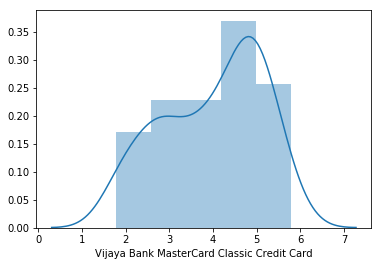

In [39]:
plt.rcParams['figure.figsize']=(6,4)
sns.distplot(vijaya_bank['Vijaya Bank MasterCard Classic Credit Card'])

In [40]:
### H0 : Vijaya Bank MasterCard Classic Credit Card is following normal distribution
### H1 : Vijaya Bank MasterCard Classic Credit Card doesn't following normal distribution

shapiro(data['Vijaya Bank MasterCard Classic Credit Card'])

# As pvalue(0.0) is less than alhpa value(0.05), so data is not normal_distribution

(0.9310665726661682, 0.0001611772895557806)

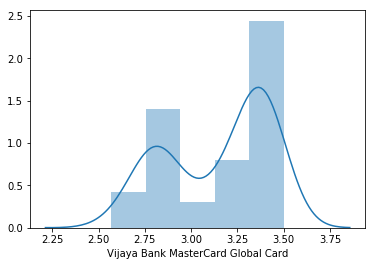

In [41]:
sns.distplot(vijaya_bank['Vijaya Bank MasterCard Global Card'])

In [42]:
### H0 : Vijaya Bank MasterCard Global Card is following normal distribution
### H1 : Vijaya Bank MasterCard Global Card doesn't following normal distribution

shapiro(data['Vijaya Bank MasterCard Global Card'])

# As pvalue(0.0) is less than alhpa value(0.05), so data is not normal_distribution

(0.8690590858459473, 2.72207842044736e-07)

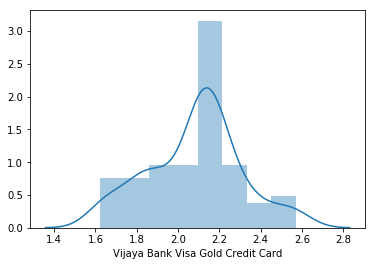

In [43]:
sns.distplot(vijaya_bank['Vijaya Bank Visa Gold Credit Card'])

In [11]:
### H0 : Vijaya Bank Visa Gold Credit Card is following normal distribution
### H1 : Vijaya Bank Visa Gold Credit Card doesn't following normal distribution

shapiro(data['Vijaya Bank Visa Gold Credit Card'])

# As pvalue(0.0) is less than alhpa value(0.05), so data is not normal_distribution

(0.9622114896774292, 0.011529198847711086)

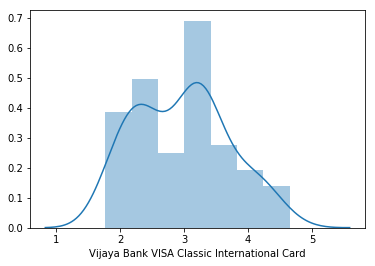

In [44]:
sns.distplot(vijaya_bank['Vijaya Bank VISA Classic International Card'])

In [45]:
### H0 : Vijaya Bank VISA Classic International Card is following normal distribution
### H1 : Vijaya Bank VISA Classic International Card doesn't following normal distribution

shapiro(data['Vijaya Bank VISA Classic International Card'])

# As pvalue(0.0) is less than alhpa value(0.05), so data is not normal_distribution

(0.9642390012741089, 0.015738578513264656)

From the above observation, the all the four columns are not normally distributed. 

## Variance Equility

In [46]:
from scipy.stats import levene

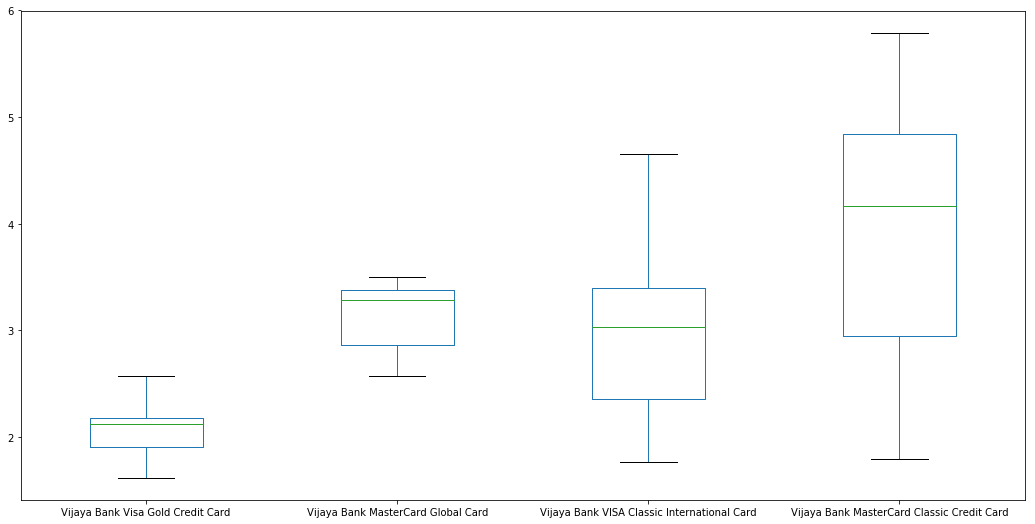

In [52]:
plt.rcParams['figure.figsize'] = (18,9)
vijaya_data.plot(kind='box')

In [53]:
levene(data['Vijaya Bank VISA Classic International Card'],data['Vijaya Bank MasterCard Classic Credit Card'],
            data['Vijaya Bank MasterCard Global Card'], data['Vijaya Bank Visa Gold Credit Card'])

LeveneResult(statistic=83.04218148133587, pvalue=1.5303914151284303e-40)

From the above output, the p-value is less than alpha value (i.e, 0.05). So the variable equility check also fails. Has two assumption also fails instead of doing one-way anova, we will do non-parametric test (i.e, Kruskal) whereas for non-parametric test there is no assumption.

## Kruskal Test

In [54]:
from scipy.stats import kruskal

In [55]:
kruskal(data['Vijaya Bank VISA Classic International Card'],data['Vijaya Bank MasterCard Classic Credit Card'],
            data['Vijaya Bank MasterCard Global Card'], data['Vijaya Bank Visa Gold Credit Card'])

KruskalResult(statistic=173.49800772601046, pvalue=2.235916063089705e-37)

When we do Kruskal test on the data, we got the p-value less than the alpha value (i.e, 0.05). So the null hypothesis is rejected. Now  we  should do less significant test (i.e, Tukey HSD)

## Tukey HSD


In [19]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [56]:
dff = pd.melt(vijaya_bank)
dff.head()

,variable,value
0,Vijaya Bank Visa Gold Credit Card,1.64
1,Vijaya Bank Visa Gold Credit Card,1.64
2,Vijaya Bank Visa Gold Credit Card,1.62
3,Vijaya Bank Visa Gold Credit Card,1.64
4,Vijaya Bank Visa Gold Credit Card,1.66


In [57]:
HSD_test = pairwise_tukeyhsd(dff['value'],dff['variable'])
HSD_test.summary()

group1,group2,meandiff,lower,upper,reject
Vijaya Bank MasterCard Classic Credit Card,Vijaya Bank MasterCard Global Card,-0.8392,-1.1115,-0.5669,True
Vijaya Bank MasterCard Classic Credit Card,Vijaya Bank VISA Classic International Card,-1.0203,-1.2926,-0.7481,True
Vijaya Bank MasterCard Classic Credit Card,Vijaya Bank Visa Gold Credit Card,-1.9064,-2.1786,-1.6341,True
Vijaya Bank MasterCard Global Card,Vijaya Bank VISA Classic International Card,-0.1811,-0.4534,0.0911,False
Vijaya Bank MasterCard Global Card,Vijaya Bank Visa Gold Credit Card,-1.0672,-1.3394,-0.7949,True
Vijaya Bank VISA Classic International Card,Vijaya Bank Visa Gold Credit Card,-0.886,-1.1583,-0.6138,True


From the HSD summary, we can see that only the combination of 'Vijaya Bank MasterCard Global Card' and 'Vijaya Bank VISA Classic International Card' is accepting the null hypothesis. So we check, is there any variance equility between them.

In [58]:
levene(data['Vijaya Bank MasterCard Global Card'],data['Vijaya Bank VISA Classic International Card'])

LeveneResult(statistic=59.3651522257044, pvalue=9.549683932863513e-13)

In [59]:
from scipy.stats import bartlett

In [60]:
bartlett(data['Vijaya Bank MasterCard Global Card'],data['Vijaya Bank VISA Classic International Card'])

BartlettResult(statistic=71.10748303924588, pvalue=3.3828461022598443e-17)

From above Levene and Bartlet results, as both the p-value is less that alpha value. The combination is not having any variance equility between them.

So, we can conclude that, The card portfolios of Vijaya Bank don't show similar performance.

